<a href="https://colab.research.google.com/github/MORIOMKAMAL/Computer-vision/blob/main/class_1_Computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

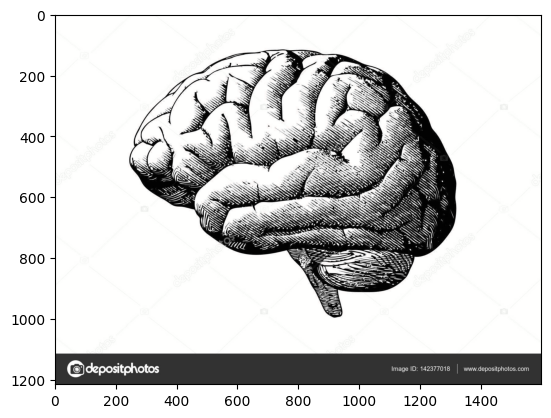

Brightness (Average pixel intensity) : 201.65688579358553
Contrast (Standard deviation Pixel values) : 93.47721064888735


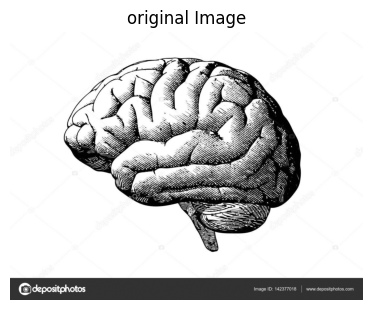

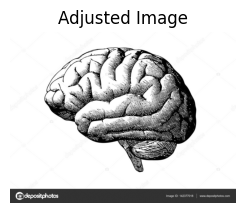

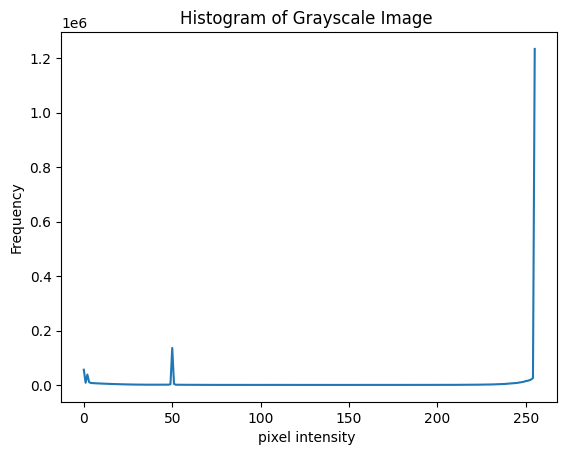

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread("/content/brain-with-black-on.jpg")
plt.imshow(image)
plt.show()

gray_image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)

gray_image.shape

brightness = np.mean(gray_image)
print(f"Brightness (Average pixel intensity) : {brightness}")

contrast  = np.std(gray_image)
print(f"Contrast (Standard deviation Pixel values) : {contrast}")

alpha = 1.5
beta = 30
adjusted_image = cv2.convertScaleAbs(gray_image,alpha = alpha, beta = beta)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(gray_image,cmap="gray")
plt.title("original Image")
plt.axis("off")
plt.show()

plt.subplot(1,2,2)
plt.imshow(gray_image,cmap="gray")
plt.title("Adjusted Image")
plt.axis("off")
plt.show()

histogram = cv2.calcHist([image] , [0] , None ,[256], [0,256])
plt.plot(histogram)
plt.title("Histogram of Grayscale Image ")
plt.xlabel("pixel intensity ")
plt.ylabel("Frequency")
plt.show()


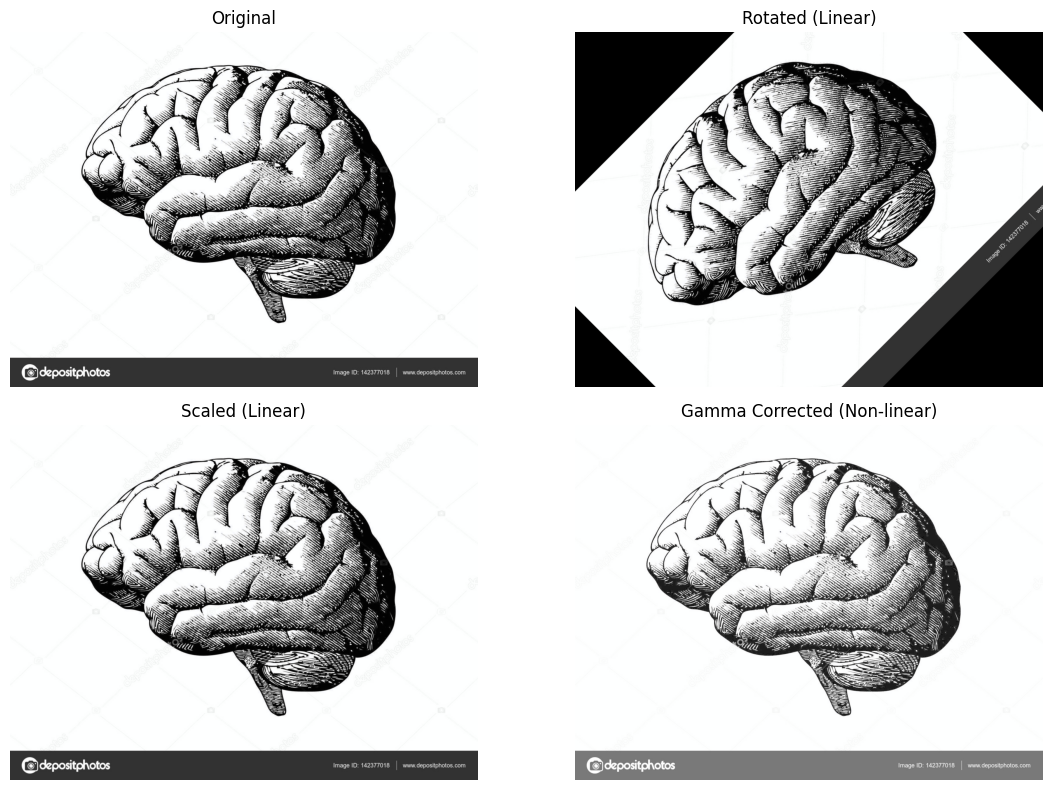

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 📥 ১. ইমেজ লোড করো
image = cv2.imread("/content/brain-with-black-on.jpg")  # যে কোনো ইমেজ path দাও
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # matplotlib এ সঠিক রঙ দেখাতে RGB করা

# 📏 ২. ইমেজের সাইজ বের করো
rows, cols = image.shape[:2]

# -------------------------------
# ✅ ৩. Linear Transformations
# -------------------------------

## 🌀 A. Rotation (Linear)
angle = 45
scale = 1.0
M_rotate = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, scale)
rotated = cv2.warpAffine(image, M_rotate, (cols, rows))

## 📏 B. Scaling (Linear)
scaled = cv2.resize(image, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)

# -------------------------------
# ✅ ৪. Non-linear Transformation
# -------------------------------

## 🌗 Gamma Correction (Non-linear)
gamma = 2.2  # >1 means darken, <1 means brighten
invGamma = 1.0 / gamma
gamma_table = np.array([((i / 255.0) ** invGamma) * 255 for i in range(256)]).astype("uint8")
gamma_corrected = cv2.LUT(image, gamma_table)

# -------------------------------
# ✅ ৫. Show all images side by side
# -------------------------------
titles = ['Original', 'Rotated (Linear)', 'Scaled (Linear)', 'Gamma Corrected (Non-linear)']
images = [image, rotated, scaled, gamma_corrected]

plt.figure(figsize=(12, 8))

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()